# Векторизация текста

## Статистические подходы

### Bags of Words
$$
\mathbf{x} = (x_1, x_2, \ldots, x_n), \quad \text{где} \,\, x_i = \#\{w_i \in d\}
$$


### TF-IDF
$$
\mathrm{TF\text{-}IDF}(w_i, d) = \left(\frac{f_{i,d}}{\sum_{k} f_{k,d}}\right) \times \log \frac{N}{1 + n_i}
$$
где
* $f_{i,d}$ — количество вхождений слова $w_i$ в документе $d$
* $N$ — общее число документов в корпусе,
* $n_i$ — количество документов, содержащих слово $w_i$

## Подход с использование DL моделей

### Word2Vec

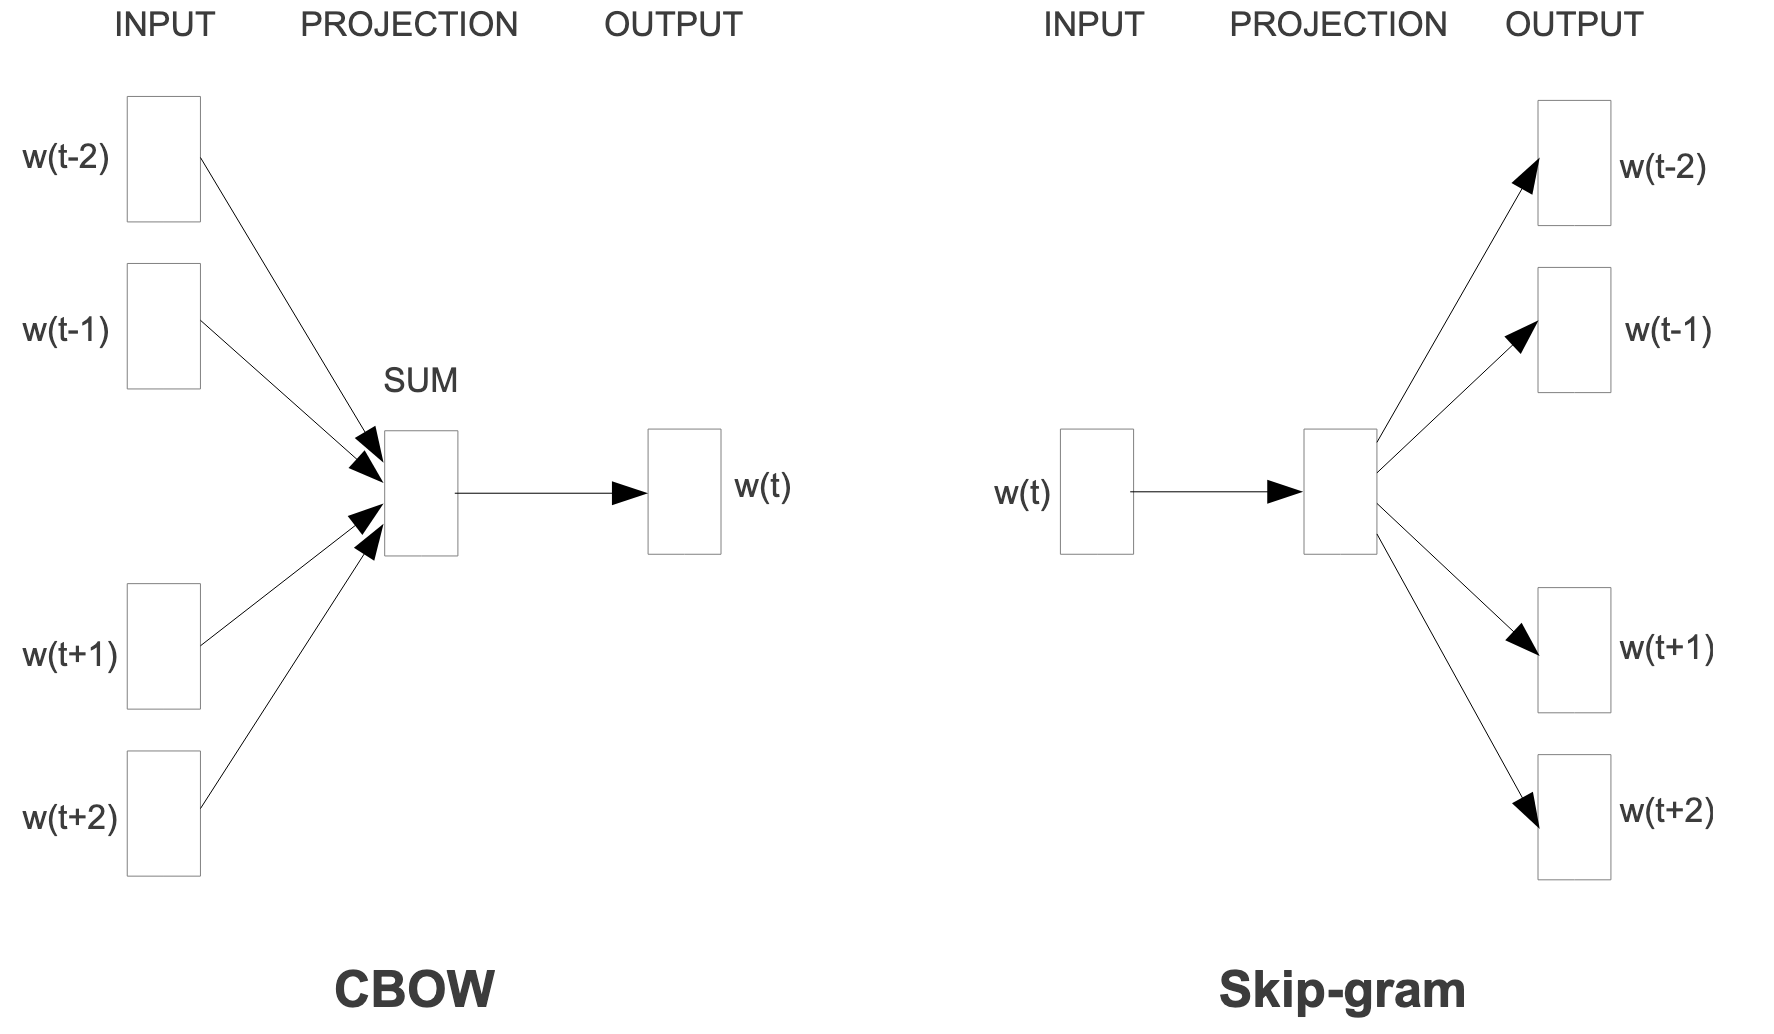

*Разберем модель Skip Gram*

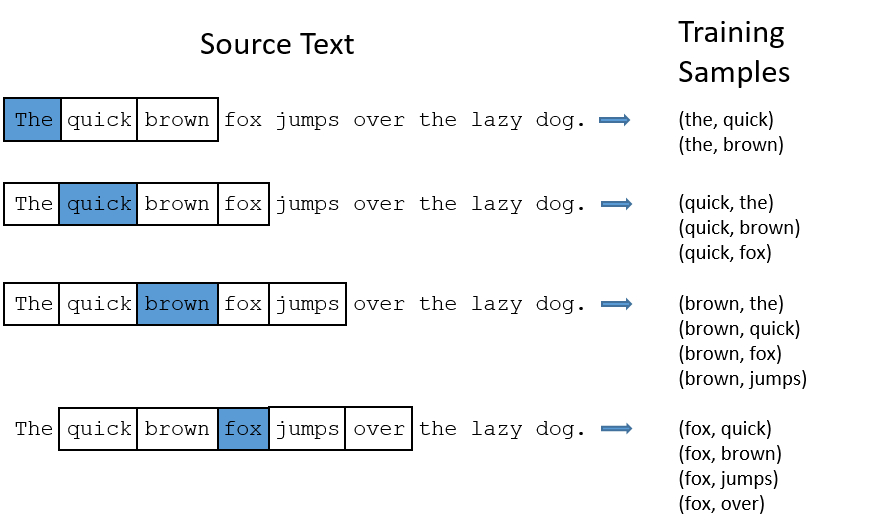

$$\newcommand{\mathleft}{\@fleqntrue\@mathmargin0pt}
{
    y_{in} = OHE\left( \text{"fox"} \right), \quad a \in  E_2^V \quad V = \text{vocab_size} \\
    y_{hidden} = y_{in}U, \quad U \in R^{V \times H} \quad H = \text{hidden_size}  \\
    y_{out} = y_{hidden}W, \quad W \in R^{H \times V} \\
    s = SoftMax\left( y_{out} \right) = \left( σ^i\left( y_{out} \right) \right) = \frac{\exp \left( y^i_{out} \right)}{\sum_{j=1}^{|V|} \exp \left( y^j_{out} \right)} = \frac{\exp \left( \left< y_{hidden}, W^i \right> \right)}{\sum_{j=1}^{|V|} \exp \left( y_{hidden}, W^j \right)} = p\!\left(W^j | y_{hidden}\right)\\
    DR\left( \text{'fox'} \right) = U\!\left( \text{'fox'} \right) + W\!\left( \text{'fox'} \right) \quad \text{-- Distributed Representation}
}$$

Где

$U$ — матрица входных весов (размер $V × H$), где H — размерность скрытого слоя. Умножение one-hot вектора на матрицу U просто выбирает строку матрицы, соответствующую слову "fox".

$W$ — матрица выходных весов (размер $H × V$).

$W^i$ — i-ый столбец матрицы W.

$U\!\left( \text{'fox'} \right)$ — строка м-цы $U$ соответсвующая слову "fox".

$W\!\left( \text{'fox'} \right)$ — столбец м-цы $W$ соответсвующая слову "fox".

**Почему у нас вообще 2 матрицы?**  
$U\!\left( \text{'fox'} \right)$ описывает слово когда оно является "центральным", $W\!\left( \text{'fox'} \right)$ как часть контекста.

#### Negative Sampling

В методе negative sampling Word2Vec мы оптимизируем следующую целевую функцию:

$$
J = - \log \sigma(u_{inp}^T w_{out}) - \sum_{i=1}^k \mathbb{E}_{w_i \sim P_n(w)}[\log \sigma(-u_{inp}^T w_i)]
$$

где:
- $\sigma$ - сигмоидная функция: $\sigma(x) = \frac{1}{1 + e^{-x}}$
- $P_n(w)$ - распределение шума для negative sampling
- $k$ - количество негативных примеров на каждый позитивный

**Распределение шума $P_n(w)$**

Распределение шума вычисляется как:

$$
P_n(w) = \frac{U(w)^{\frac{3}{4}}}{Z}
$$

где:
- $U(w)$ - униграммная частота слова $w$ в корпусе
- $Z = \sum_{w} U(w)^{\frac{3}{4}}$ - нормировочная константа
- Степень $\frac{3}{4}$ была подобрана эмпирически для наилучших результатов


Такая модификация:
1. Уменьшает доминирование частых слов (типа "the", "a")
2. Улучшает представление редких слов
3. Создает более сглаженное распределение по сравнению с исходными частотами

Подробнее в учебнике Еленый Войта: [учебник (открывается с VPN)](hhttps://lena-voita.github.io/nlp_course/word_embeddings.html#w2v_idea)



## Практика

In [ ]:
!pip install -qq datasets
!pip uninstall numpy pandas
!pip install numpy
!pip3 install pandas
!pip install -qq gensim
!python -m spacy download ru_core_news_sm

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/lib/python3.12/dist-packages/numpy-1.26.4.dist-info/*
    /usr/local/lib/python3.12/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.12/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so
    /usr/local/lib/python3.12/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.12/dist-packages/numpy/*
Proceed (Y/n)? Y
  Successfully uninstalled numpy-1.26.4
Found existing installation: pandas 2.3.2
Uninstalling pandas-2.3.2:
  Would remove:
    /usr/local/lib/python3.12/dist-packages/pandas-2.3.2.dist-info/*
    /usr/local/lib/python3.12/dist-packages/pandas/*
Proceed (Y/n)? Y
  Successfully uninstalled pandas-2.3.2
  Using cached numpy-2.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
Using cached numpy-2.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64

  Using cached pandas-2.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (91 kB)
Using cached pandas-2.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.2 which is incompatible.
cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.2 which is incompatible.
dask-cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.2 which is incompatible.
tsfresh 0.21.1 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2,

In [ ]:
!pip install -qq wget

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import spacy
from datasets import load_dataset

from typing import List, Tuple

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
def load_sib200_ru() -> Tuple[Tuple[List[str], List[int]], Tuple[List[str], List[int]], Tuple[List[str], List[int]], List[str]]:
    trainset = load_dataset('Davlan/sib200', 'rus_Cyrl', split='train')
    X_train = trainset['text']
    y_train = trainset['category']
    valset = load_dataset('Davlan/sib200', 'rus_Cyrl', split='validation')
    X_val = valset['text']
    y_val = valset['category']
    testset = load_dataset('Davlan/sib200', 'rus_Cyrl', split='test')
    X_test = testset['text']
    y_test = testset['category']
    categories = set(y_train)
    unknown_categories = set(y_val) - categories
    if len(unknown_categories) > 0:
        err_msg = f'The categories {unknown_categories} are represented in the validation set, but they are not represented in the training set.'
        raise RuntimeError(err_msg)
    unknown_categories = set(y_test) - categories
    if len(unknown_categories) > 0:
        err_msg = f'The categories {unknown_categories} are represented in the test set, but they are not represented in the training set.'
        raise RuntimeError(err_msg)
    categories = sorted(list(categories))
    y_train = [categories.index(it) for it in y_train]
    y_val = [categories.index(it) for it in y_val]
    y_test = [categories.index(it) for it in y_test]
    return (X_train, y_train), (X_val, y_val), (X_test, y_test), categories

In [ ]:
def normalize_text(s: str, nlp_pipeline: spacy.Language) -> str:
    doc = nlp_pipeline(s)
    lemmas = [
        ('<NUM>' if token.like_num
         else token.lemma_.lower() + '_' + token.pos_)
        for token in filter(lambda it1: not it1.is_punct and not it1.like_num, doc)
    ]
    return lemmas

## Загрузми данные

In [ ]:
train_data, val_data, test_data, classes_list = load_sib200_ru()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

train.tsv: 0.00B [00:00, ?B/s]

dev.tsv: 0.00B [00:00, ?B/s]

test.tsv: 0.00B [00:00, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
train_data[0][:2]

['Турция с трёх сторон окружена морями: на западе — Эгейским, на севере — Чёрным и на юге — Средиземным.',
 'В начале войны они в основном передвигались по поверхности моря, но когда радары начали совершенствоваться и становились более точными, подводным лодкам пришлось уйти под воду, чтобы их не могли обнаружить.']

In [ ]:
train_data[1][:2]

[1, 4]

In [ ]:
classes_list

['entertainment',
 'geography',
 'health',
 'politics',
 'science/technology',
 'sports',
 'travel']

## Загрузим Word2Vec

In [ ]:
import gensim
import logging
import wget
import sys
import zipfile

In [ ]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Зоопарк моделей: https://rusvectores.org/ru/models/

In [ ]:
model_url = 'http://vectors.nlpl.eu/repository/20/180.zip'
# Download the model zip file
zip_filename = wget.download(model_url)

# Extract the 'model.bin' file from the zip archive
with zipfile.ZipFile(zip_filename, 'r') as archive:
    archive.extract('model.bin')

# Load the model using the extracted file
model = gensim.models.KeyedVectors.load_word2vec_format('model.bin', binary=True)

In [ ]:
model.most_similar(positive=['бежать_VERB'], topn=10)

[('убегать_VERB', 0.8201154470443726),
 ('побежать_VERB', 0.7401164770126343),
 ('мчаться_VERB', 0.6910833716392517),
 ('бежать_ADJ', 0.6624220013618469),
 ('убежать_VERB', 0.6616870164871216),
 ('гнать_VERB', 0.6583402752876282),
 ('удирать_VERB', 0.6573595404624939),
 ('бежать_NOUN', 0.6431879997253418),
 ('гнаться_VERB', 0.6415179967880249),
 ('добежать_VERB', 0.6385061144828796)]

## Предвраительная обработка текстов

In [ ]:
nlp = spacy.load('ru_core_news_sm')

In [ ]:
print(normalize_text(train_data[0][0], nlp))

['турция_PROPN', 'с_ADP', 'сторона_NOUN', 'окружить_VERB', 'морями_NOUN', 'на_ADP', 'запад_NOUN', 'эгейским_ADJ', 'на_ADP', 'север_NOUN', 'чёрный_PROPN', 'и_CCONJ', 'на_ADP', 'юг_NOUN', 'средиземный_ADJ']


In [ ]:
train_data_norm = []
for sent in tqdm(train_data[0]):
    sent_norm = normalize_text(sent, nlp)
    sent_norm = [w for w in sent_norm if w in model.key_to_index]
    train_data_norm.append(sent_norm)
val_data_norm = []
for sent in tqdm(val_data[0]):
    sent_norm = normalize_text(sent, nlp)
    sent_norm = [w for w in sent_norm if w in model.key_to_index]
    val_data_norm.append(sent_norm)
test_data_norm = []
for sent in tqdm(test_data[0]):
    sent_norm = normalize_text(sent, nlp)
    sent_norm = [w for w in sent_norm if w in model.key_to_index]
    test_data_norm.append(sent_norm)

  0%|          | 0/701 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/204 [00:00<?, ?it/s]

In [ ]:
train_data_norm[:2]

[['турция_PROPN',
  'сторона_NOUN',
  'окружить_VERB',
  'запад_NOUN',
  'север_NOUN',
  'юг_NOUN',
  'средиземный_ADJ'],
 ['начало_NOUN',
  'война_NOUN',
  'основный_ADJ',
  'передвигаться_VERB',
  'поверхность_NOUN',
  'море_NOUN',
  'радар_NOUN',
  'начать_VERB',
  'совершенствоваться_VERB',
  'становиться_VERB',
  'более_ADV',
  'точный_ADJ',
  'подводный_ADJ',
  'прийтись_VERB',
  'уйти_VERB',
  'вода_NOUN',
  'мочь_VERB',
  'обнаружить_VERB']]

## Посчитаем обратные частоты слов

In [ ]:
from collections import Counter

word_counter = Counter()
for sent in train_data_norm:
    word_counter.update(sent)

word_freq = (pd.DataFrame.from_dict(word_counter, orient='index', columns=['n'])
               .rename_axis('word')
               .reset_index()
               .sort_values('n'))

word_freq['freq'] = word_freq['n'] / word_freq['n'].sum()
word_freq['side_freq'] = (1 - np.log(word_freq['freq'])) / (1 - np.log(word_freq['freq'])).max()

word_freq = word_freq.sort_values('n', ascending=False)

word_freq

,word,n,freq,side_freq
23,мочь_VERB,87,0.010304,0.555237
60,год_NOUN,72,0.008528,0.574084
251,также_ADV,48,0.005685,0.614464
53,человек_NOUN,44,0.005211,0.623130
268,место_NOUN,44,0.005211,0.623130
...,...,...,...,...
2781,рассказывать_VERB,1,0.000118,1.000000
2770,приставка_NOUN,1,0.000118,1.000000
2826,июнь_NOUN,1,0.000118,1.000000
2831,обеспокоенность_NOUN,1,0.000118,1.000000


In [ ]:
weighter = dict({word: freq for (word, freq) in zip(word_freq["word"], word_freq["side_freq"])})
weighter.get('год_NOUN')

0.5740836052604302

In [ ]:
weighter.get('neon', 1.0)

1.0

In [ ]:
train_data_wnorm = []
for sent in tqdm(train_data_norm):
    wsent = [weighter.get(w, 1.0) for w in sent]
    train_data_wnorm.append((sent, wsent))

val_data_wnorm = []
for sent in tqdm(val_data_norm):
    wsent = [weighter.get(w, 1.0) for w in sent]
    val_data_wnorm.append((sent, wsent))

test_data_wnorm = []
for sent in tqdm(test_data_norm):
    wsent = [weighter.get(w, 1.0) for w in sent]
    test_data_wnorm.append((sent, wsent))

  0%|          | 0/701 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/204 [00:00<?, ?it/s]

In [ ]:
train_data_wnorm[3]

(['впрочем_ADV',
  'зима_NOUN',
  'красота_NOUN',
  'шарм_NOUN',
  'горный_ADJ',
  'где_ADV',
  'выпадать_VERB',
  'много_ADV',
  'снег_NOUN',
  'доступный_ADJ',
  'занятие_NOUN',
  'катание_NOUN',
  'горный_ADJ',
  'лыжа_NOUN',
  'сноуборд_NOUN'],
 [0.9309689510585614,
  0.8619379021171228,
  0.9309689510585614,
  1.0,
  0.8215573271009344,
  0.6681432470965759,
  1.0,
  0.8215573271009344,
  0.8905883760423731,
  0.9309689510585614,
  0.8905883760423731,
  0.8397148680433293,
  0.8215573271009344,
  0.8215573271009344,
  1.0])

In [ ]:
assert len(train_data_wnorm) == len(train_data[0])
assert len(val_data_wnorm) == len(val_data[0])
assert len(test_data_wnorm) == len(test_data[0])

## To Distributes space

In [ ]:
model.get_mean_vector(train_data_wnorm[3][0]).shape

(300,)

In [ ]:
model.get_mean_vector(train_data_wnorm[3][0]).mean()

-0.0018085877

In [ ]:
model.get_mean_vector(train_data_wnorm[3][0], train_data_wnorm[3][1]).mean()

-0.00170569

In [ ]:
X_train = np.array([model.get_mean_vector(sent[0], sent[1]) for sent in train_data_wnorm])
y_train = np.array(train_data[1])

X_val = np.array([model.get_mean_vector(sent[0], sent[1]) for sent in val_data_wnorm])
y_val = np.array(val_data[1])

X_test = np.array([model.get_mean_vector(sent[0], sent[1]) for sent in test_data_wnorm])
y_test = np.array(test_data[1])

In [ ]:
X_train.shape

(701, 300)

## Train classifier

In [ ]:
classifier = Pipeline(steps=[
    ('cls', LogisticRegression(solver='saga', max_iter=200, random_state=42))
])

In [ ]:
cv = GridSearchCV(
    estimator=classifier,
    param_grid={
        'cls__C': [1e-1, 1, 10, 100, 1000],
        'cls__penalty': ['l1', 'l2']
    },
    scoring='f1_macro',
    cv=5,
    refit=True,
    n_jobs=-1,
    verbose=True
)

In [ ]:
cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cls',
                                        LogisticRegression(max_iter=200,
                                                           random_state=42,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'cls__C': [0.1, 1, 10, 100, 1000],
                         'cls__penalty': ['l1', 'l2']},
             scoring='f1_macro', verbose=True)

In [ ]:
y_pred = cv.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred, target_names=classes_list))

                    precision    recall  f1-score   support

     entertainment       0.71      0.53      0.61        19
         geography       0.76      0.76      0.76        17
            health       0.76      0.86      0.81        22
          politics       0.93      0.83      0.88        30
science/technology       0.73      0.90      0.81        51
            sports       0.90      0.76      0.83        25
            travel       0.78      0.72      0.75        40

          accuracy                           0.79       204
         macro avg       0.80      0.77      0.78       204
      weighted avg       0.80      0.79      0.79       204



# Рекуррентные нейронные сети

## Архитектуры

### Elman RNN (1990)

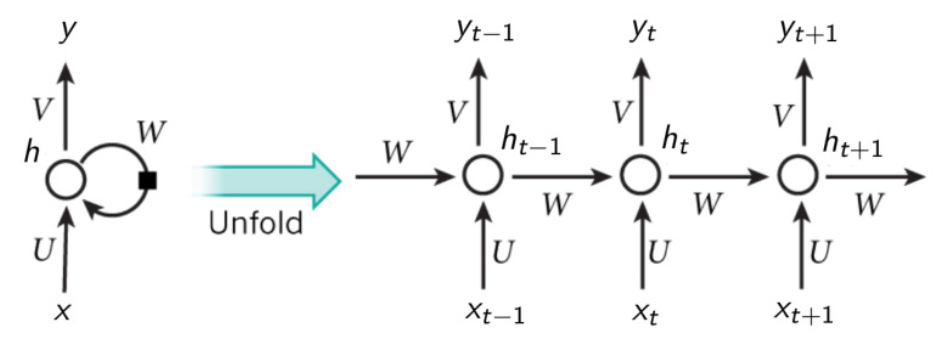

$$ h_t = \sigma \left( Ux_t + b_U+ Wh_{t-1} + b_W\right) $$
$$ y_t = \sigma \left( Vh_t + b_V\right) $$

Проблема RNN - вызрыв и затухание градиента.

### LSTM (1997)

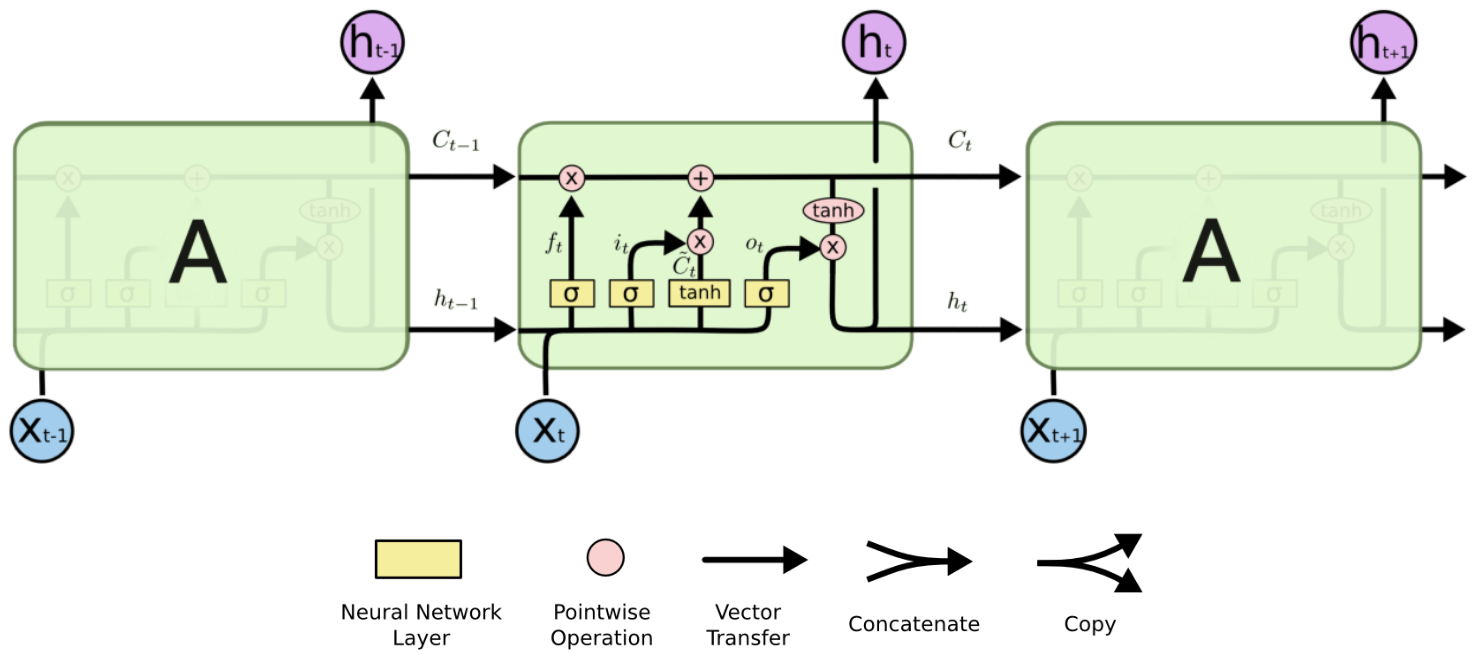

$$\newcommand{\mathleft}{\@fleqntrue\@mathmargin0pt}
{
f_t = \sigma\left( W_f \cdot \left[ h_{t-1}, x_t \right] + b_f \right) \quad \text{---} \quad \text{фильтр забвения (forget gate)} \\
i_t = \sigma\left( W_i \cdot \left[ h_{t-1}, x_t \right] + b_i \right) \quad \text{---} \quad \text{фильтр входных данных (input gate)} \\
o_t = \sigma\left( W_o \cdot \left[ h_{t-1}, x_t \right] + b_o \right) \quad \text{---} \quad \text{фильтр выходных данных (output gate)} \\
\tilde{C}_t = \tanh \left( W_c \cdot \left[ h_{t-1}, x_t \right] + b_c \right) \quad \text{---} \quad \text{модель нового контекста} \\
C_t = f_t \odot C_{t-1} + i_t \odot \tilde{C}_t \quad \text{---} \quad \text{новые долгосрочные данные} \\
h_t = o_t \cdot \tanh(C_t) \quad \text{---} \quad \text{новые краткосрочные данные} \\
}$$


### LSTM with peepholes (2000)

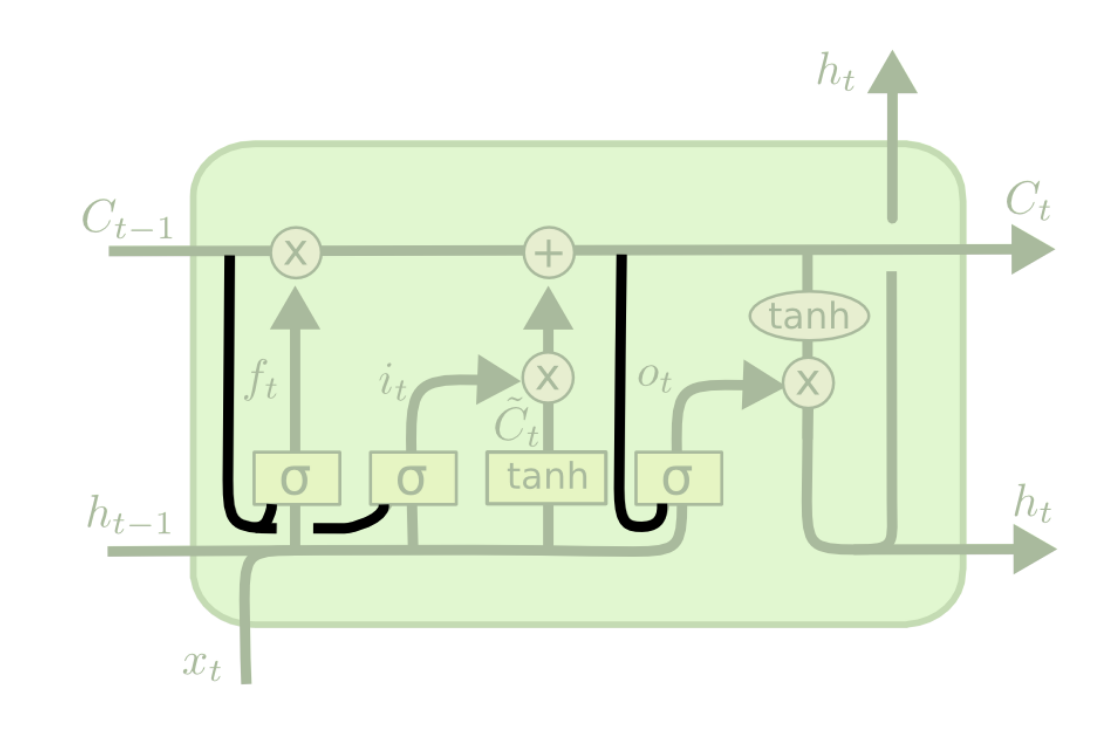

$$\newcommand{\mathleft}{\@fleqntrue\@mathmargin0pt}
{
f_t = \sigma\left( W_f \cdot \left[ C_{t-1},  h_{t-1}, x_t \right] + b_f \right) \quad \text{---} \quad \text{фильтр забвения (forget gate)} \\
i_t = \sigma\left( W_i \cdot \left[ C_{t-1}, h_{t-1}, x_t \right] + b_i \right) \quad \text{---} \quad \text{фильтр входных данных (input gate)} \\
o_t = \sigma\left( W_o \cdot \left[ C_t, h_{t-1}, x_t \right] + b_o \right) \quad \text{---} \quad \text{фильтр выходных данных (output gate)} \\
\tilde{C}_t = \tanh \left( W_c \cdot \left[ h_{t-1}, x_t \right] + b_c \right) \quad \text{---} \quad \text{модель нового контекста} \\
C_t = f_t \odot C_{t-1} + i_t \odot \tilde{C}_t \quad \text{---} \quad \text{новые долгосрочные данные} \\
h_t = o_t \cdot \tanh(C_t) \quad \text{---} \quad \text{новые краткосрочные данные} \\
}$$


### Gated Recurrent Unit (GRU) (2014)

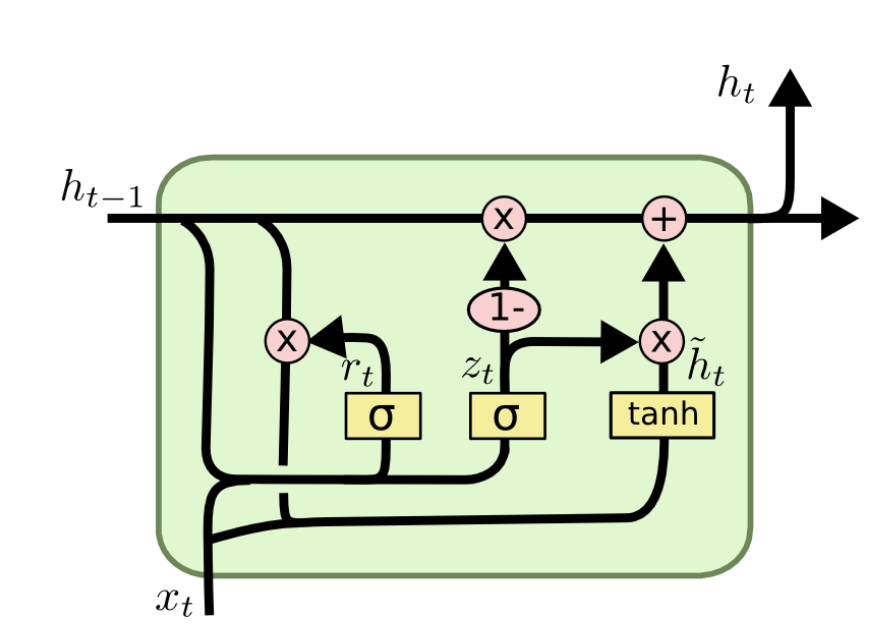

$$\newcommand{\mathleft}{\@fleqntrue\@mathmargin0pt}
{
z_t = \sigma\left( W_z \cdot \left[h_{t-1}, x_t \right] + b_z \right) \quad \text{---} \quad \text{фильтр обновления} \\
r_t = \sigma\left( W_r \cdot \left[h_{t-1}, x_t \right] + b_r \right) \quad \text{---} \quad \text{фильтр перезагнрузки} \\
\tilde{h}_t = \tanh \left( W_h \cdot \left[ r_t \cdot h_{t-1}, x_t \right] + b_h \right) \\
h_t = \left( 1- z_t \right) \odot h_{t-1} + z_t \odot \tilde{h}_t \quad \text{---} \quad \text{новый вектор информации} \\
}$$


[Greff, et al., LSTM: A Search Space Odyssey (2015)](https://arxiv.org/abs/1503.04069)- обзорная статья с большим колличеством сравнений разных вариантов LSTM

### Simple Recurrent Unit (SRU) (2018)

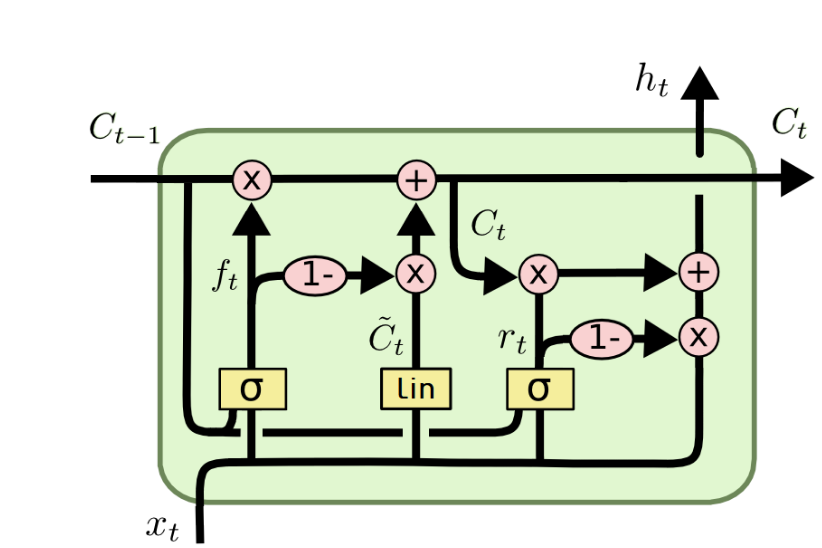

$$\newcommand{\mathleft}{\@fleqntrue\@mathmargin0pt}
{
f_t = \sigma\left( W_f x_t + v_f \odot C_{t-1} + b_f \right) \quad \text{---} \quad \text{forget gate} \\
r_t = \sigma\left( W_r x_t + v_r \odot C_{t-1} + b_r \right) \quad \text{---} \quad \text{reset gate} \\
\tilde{C}_t = W_c x_t \\
C_t = f_t \odot C_{t-1} + \left(1 - f_t\right) \odot \tilde{C}_t \quad \text{---} \quad \text{новые долгосрочные данные} \\
h_t = r_t \odot C_{t} + \left(1 - r_t\right) \odot {x}_t
}
$$


## Практика

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import random
from sklearn.metrics import f1_score # Для F1-macro

In [ ]:
# Установка seed для воспроизводимости
SEED = 42
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

### Векторизуем текст

In [ ]:
type(train_data_norm)

list

In [ ]:
train_data_norm[0]

['турция_PROPN',
 'сторона_NOUN',
 'окружить_VERB',
 'запад_NOUN',
 'север_NOUN',
 'юг_NOUN',
 'средиземный_ADJ']

In [ ]:
vectorizer = lambda x: model.get_vector(x, norm=True)

In [ ]:
vectorize_seq = lambda x: np.array(list(map(vectorizer, x)))

In [ ]:
vectorize_seq(train_data_norm[0]).shape

(7, 300)

In [ ]:
train_vectorized = list(map(vectorize_seq, train_data_norm))
# train_vectorized List[np.2Darray]
val_vectorized = list(map(vectorize_seq, val_data_norm))
test_vectorized = list(map(vectorize_seq, test_data_norm))

In [ ]:
y_train = np.array(train_data[1])
y_val = np.array(val_data[1])
y_test = np.array(test_data[1])

assert len(train_vectorized) == y_train.shape[0]
assert len(val_vectorized) == y_val.shape[0]
assert len(test_vectorized) == y_test.shape[0]

### Паддинг

In [ ]:
EMBEDDING_DIM = train_vectorized[0].shape[1]
print(f"Размерность Word2Vec эмбеддингов (EMBEDDING_DIM): {EMBEDDING_DIM}")

Размерность Word2Vec эмбеддингов (EMBEDDING_DIM): 300


In [ ]:
max_seq_len_train = max(len(seq) for seq in train_vectorized)
max_seq_len_val = max(len(seq) for seq in val_vectorized)
max_seq_len_test = max(len(seq) for seq in test_vectorized)
MAX_SEQ_LEN = max(max_seq_len_train, max_seq_len_val, max_seq_len_test)
MAX_SEQ_LEN

29

In [ ]:
def pad_sequences(sequences, max_len, embedding_dim):
    padded_sequences = []
    for seq in sequences:
        if len(seq) > max_len:
            padded_sequences.append(seq[:max_len])
        else:
            padding_needed = max_len - len(seq)
            # Создаем массив нулей для padding
            padding_array = np.zeros((padding_needed, embedding_dim), dtype=np.float32)
            padded_sequences.append(np.vstack((seq, padding_array)))
    return np.array(padded_sequences) # Возвращаем один большой NumPy массив

In [ ]:
train_padded = pad_sequences(train_vectorized, MAX_SEQ_LEN, EMBEDDING_DIM)
val_padded = pad_sequences(val_vectorized, MAX_SEQ_LEN, EMBEDDING_DIM)
test_padded = pad_sequences(test_vectorized, MAX_SEQ_LEN, EMBEDDING_DIM)

In [ ]:
train_padded.shape

(701, 29, 300)

In [ ]:
val_padded.shape

(99, 29, 300)

### Преобразуем в понятные торчу классы

In [ ]:
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = torch.tensor(texts, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)
    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.texts[idx], self.labels[idx]

In [ ]:
train_dataset = TextDataset(train_padded, y_train)
val_dataset = TextDataset(val_padded, y_val)
test_dataset = TextDataset(test_padded, y_test)

In [ ]:
BATCH_SIZE = 16

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

### Модель

In [ ]:
class TextClassifierLSTM(nn.Module):
    def __init__(
        self,
        embedding_dim,
        hidden_dim,
        output_dim,
        n_layers,
        bidirectional,
        dropout
    ):
        super().__init__()

        self.lstm = nn.LSTM(
            embedding_dim,
            hidden_dim,
            num_layers=n_layers,
            bidirectional=bidirectional,
            dropout=dropout,
            batch_first=True
        )

        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, text):
        # text = [batch size, seq len, embedding dim] - это наш вход

        # Пропускаем dropout здесь, так как нет слоя nn.Embedding
        # Мы можем применить его к входам LSTM, если хотим
        # embedded = self.dropout(text)

        # output = [batch size, seq len, hidden_dim * num_directions]
        # hidden = [num layers * num directions, batch size, hidden_dim]
        # cell = [num layers * num directions, batch size, hidden_dim]
        output, (hidden, cell) = self.lstm(text) # ИЛИ self.lstm(embedded)

        # Используем последнее скрытое состояние для классификации
        if self.lstm.bidirectional:
            # hidden = [num_layers * 2, batch size, hidden_dim]
            # Берем последнее скрытое состояние для последнего слоя и обоих направлений
            hidden_forward = hidden[-2, :, :]  # Последний слой, прямое направление
            hidden_backward = hidden[-1, :, :] # Последний слой, обратное направление
            hidden_combined = self.dropout(torch.cat((hidden_forward, hidden_backward), dim=1))
            # hidden_combined = [batch size, hidden_dim * 2]
        else:
            # hidden = [num_layers, batch size, hidden_dim]
            hidden_combined = self.dropout(hidden[-1, :, :]) # Последний слой
            # hidden_combined = [batch size, hidden_dim]

        return self.fc(hidden_combined)

### Train

In [ ]:
HIDDEN_DIM = 256
OUTPUT_DIM = 7
N_LAYERS = 2
BIDIRECTIONAL = False
DROPOUT = 0.5

In [ ]:
model = TextClassifierLSTM(
    EMBEDDING_DIM,
    HIDDEN_DIM,
    OUTPUT_DIM,
    N_LAYERS,
    BIDIRECTIONAL,
    DROPOUT
)

print(model)

TextClassifierLSTM(
  (lstm): LSTM(300, 256, num_layers=2, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=256, out_features=7, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'Количество обучаемых параметров: {count_parameters(model):,}')

Количество обучаемых параметров: 1,099,527


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

In [ ]:
def calculate_f1_macro(preds, y):
    _, predicted_labels = torch.max(preds, 1) # Получаем индексы наиболее вероятных классов
    return f1_score(y.cpu().numpy(), predicted_labels.cpu().numpy(), average='macro', zero_division=0)

In [ ]:
def train(model, dataloader, optimizer, criterion):
    model.train()
    epoch_loss = 0
    epoch_f1_macro = 0

    predictions_list = []
    labels_list = []

    for texts, labels in tqdm(dataloader, desc="Training"):
        texts, labels = texts.to(device), labels.to(device)

        optimizer.zero_grad()
        predictions = model(texts)
        loss = criterion(predictions, labels)

        # Для расчета F1-macro накапливаем предсказания и истинные метки
        predictions_list.append(predictions.detach().cpu())
        labels_list.append(labels.detach().cpu())

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    # Расчет F1-macro для всей эпохи
    all_predictions = torch.cat(predictions_list)
    all_labels = torch.cat(labels_list)
    epoch_f1_macro = calculate_f1_macro(all_predictions, all_labels)

    return epoch_loss / len(dataloader), epoch_f1_macro

In [ ]:
def evaluate(model, dataloader, criterion):
    model.eval()
    epoch_loss = 0
    epoch_f1_macro = 0

    predictions_list = []
    labels_list = []

    with torch.no_grad():
        for texts, labels in tqdm(dataloader, desc="Evaluating"):
            texts, labels = texts.to(device), labels.to(device)

            predictions = model(texts)
            loss = criterion(predictions, labels)

            predictions_list.append(predictions.cpu())
            labels_list.append(labels.cpu())

            epoch_loss += loss.item()

    all_predictions = torch.cat(predictions_list)
    all_labels = torch.cat(labels_list)
    epoch_f1_macro = calculate_f1_macro(all_predictions, all_labels)

    return epoch_loss / len(dataloader), epoch_f1_macro

In [ ]:
N_EPOCHS = 10
PATIENCE = 3
best_val_f1_macro = -float('inf')
epochs_no_improve = 0

In [ ]:
for epoch in range(N_EPOCHS):
    train_loss, train_f1_macro = train(model, train_dataloader, optimizer, criterion)
    val_loss, val_f1_macro = evaluate(model, val_dataloader, criterion)

    print(f'Epoch: {epoch+1:02}')
    print(f'\tTrain Loss: {train_loss:.3f} | Train F1-macro: {train_f1_macro:.3f}')
    print(f'\tVal. Loss: {val_loss:.3f} | Val. F1-macro: {val_f1_macro:.3f}')

    # Логика ранней остановки на основе F1-macro
    if val_f1_macro > best_val_f1_macro:
        best_val_f1_macro = val_f1_macro
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        print(f'\tВалидационный F1-macro не улучшился. Эпох без улучшения: {epochs_no_improve}')
        if epochs_no_improve == PATIENCE:
            print(f'Ранняя остановка! Нет улучшения на валидационном наборе за {PATIENCE} эпох.')
            break

Training:   0%|          | 0/44 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/7 [00:00<?, ?it/s]

Epoch: 01
	Train Loss: 1.898 | Train F1-macro: 0.056
	Val. Loss: 1.879 | Val. F1-macro: 0.058


Training:   0%|          | 0/44 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/7 [00:00<?, ?it/s]

Epoch: 02
	Train Loss: 1.877 | Train F1-macro: 0.057
	Val. Loss: 1.889 | Val. F1-macro: 0.058
	Валидационный F1-macro не улучшился. Эпох без улучшения: 1


Training:   0%|          | 0/44 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/7 [00:00<?, ?it/s]

Epoch: 03
	Train Loss: 1.884 | Train F1-macro: 0.064
	Val. Loss: 1.874 | Val. F1-macro: 0.058
	Валидационный F1-macro не улучшился. Эпох без улучшения: 2


Training:   0%|          | 0/44 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/7 [00:00<?, ?it/s]

Epoch: 04
	Train Loss: 1.878 | Train F1-macro: 0.057
	Val. Loss: 1.877 | Val. F1-macro: 0.058
	Валидационный F1-macro не улучшился. Эпох без улучшения: 3
Ранняя остановка! Нет улучшения на валидационном наборе за 3 эпох.


In [ ]:
test_loss, test_f1_macro = evaluate(model, test_dataloader, criterion)
print(f'Test Loss: {test_loss:.3f} | Test F1-macro: {test_f1_macro:.3f}')

Evaluating:   0%|          | 0/13 [00:00<?, ?it/s]

Test Loss: 0.937 | Test F1-macro: 0.726
